In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import eval_helper as eh
import curve_fitting as cf

#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


 starting index is: 207


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std   	min    	max        
1  	100   	435891 	832425	3013.39	2.10193e+06
2  	100   	374378 	784090	3013.39	2.10193e+06
3  	100   	249381 	663029	3013.39	2.10193e+06
4  	100   	146237 	519842	3051.55	2.04154e+06
5  	100   	278679 	696255	3047.2 	2.04227e+06
6  	100   	125669 	483928	3037.15	2.04225e+06
7  	100   	176753 	568221	3020.53	2.04215e+06
8  	100   	156300 	536686	3020.53	2.04224e+06
9  	100   	125713 	483958	3006.55	2.04346e+06
10 	100   	74672.1	374465	3006.55	2.04116e+06
11 	100   	74673.6	374485	3020.53	2.04159e+06
12 	100   	74705.5	374566	3008.11	2.04231e+06
13 	100   	54524.1	318142	3008.44	2.04231e+06
14 	100   	94983.1	422471	3008.44	2.04177e+06
15 	100   	64591.7	347632	3008.44	2.04192e+06
16 	100   	23734.7	202732	3008.44	2.04093e+06
17 	100   	33930.5	247720	3008.44	2.04211e+06
18 	100   	84795.8	399340	3003.48	2.04209e+06
19 	100   	33909.8	247672	3003.48	2.04097e+06


In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [7]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = eh.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} p:{fact}')
    return p_names,p_fact
    

In [8]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [967.6930855476008, 0.31618325050668206, 6.658534266439917, 0.12049225854189005, 238.62610219892449, 0.052206866276066285, 6.158030032441868, 0.23125419933598795, 19.970195758474105, 0.24386334145036936, 0.8113098858813227, 0.01907643994868738, 7.577412965675588, 0.26385596030619807, 0.10517474559624335, 1.569317307927205, 54.81358396024464, 0.11571459731992265, -29.222892021816236, 9.292367105478052, 16286.789884292655, 2.6953429178497372, 3.6358259004645457]
 starting index is: 202
[inact_err, act_err]: (1.8582437422603695, 0.8606630906320897, 0.6859165820614993, 0.07386167139308066, 18.985359666796832, 49.962499999997995, 0.06391645965000618)


In [9]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:9.17 ub:1000.0 p:0.15068877998687405
a1_1 - lb:0.0 ub:10.0 p:0.7190022625094624
b1_0 - lb:0.0 ub:10.0 p:0.34848590266373713
b1_1 - lb:0.0177 ub:0.4424 p:0.39619103825977803
a2_0 - lb:3.9617 ub:400.0 p:0.5334926762551679
a2_1 - lb:0.0 ub:0.1109 p:0.8103048736289998
b2_0 - lb:0.113 ub:10.0 p:0.7603499244289565
b2_1 - lb:0.0122 ub:0.3054 p:0.8184618019592703
a3_0 - lb:0.0 ub:359.0595 p:0.7310380068460375
a3_1 - lb:0.0132 ub:0.3297 p:0.21024020926685733
b3_0 - lb:0.1506 ub:10.0 p:0.2120677656974589
b3_1 - lb:0.0 ub:0.1824 p:0.27249477960902835
bh_0 - lb:0.0 ub:14.1507 p:0.44558730162796123
bh_1 - lb:0.0578 ub:1.445 p:0.3159082791099386
bh_2 - lb:0.0139 ub:0.348 p:0.4677614049126817
ah_0 - lb:0.1152 ub:10.0 p:0.06460323377535582
ah_1 - lb:0.1 ub:815.0 p:0.25573775531340553
ah_2 - lb:0.0054 ub:0.134 p:0.25334974259515897
vShift - lb:-30.0 ub:30.0 p:0.1649046052358365
vShift_inact - lb:-30.0 ub:30.0 p:0.697894516580259
maxrate - lb:1600.0 ub:40000.0 p:0.47855477947459546
ahfactor - 

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

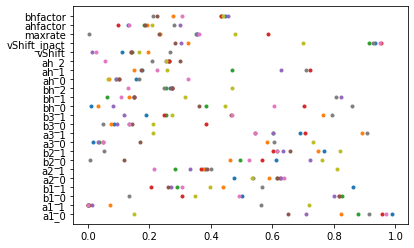

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [11]:
p = best_hof

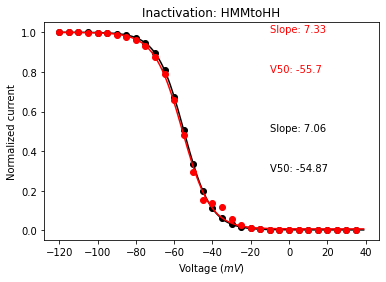

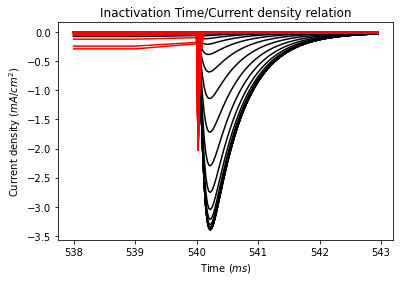

In [12]:
#plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

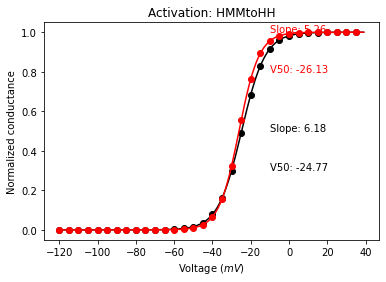

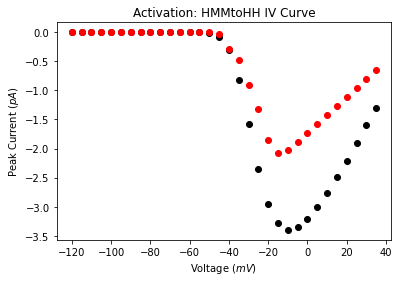

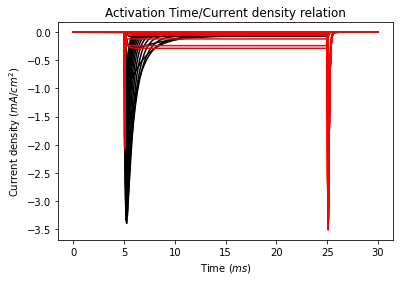

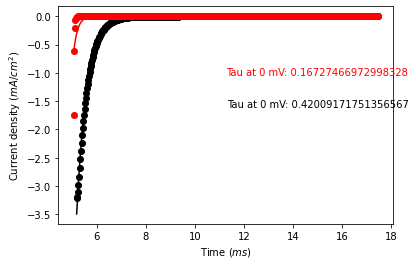

In [13]:
#plotter.plot_act(None,'na16' , False,p,'na12mut8st',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

# Test HH Target data

In [14]:
wild_data = {}
# Getting objective base values for HH model.
is_HMM = False 
# Create genSim objects

act_obj = Activation_general(channel_name='na16')
tau0 = act_obj.get_Tau_0mV()
act_obj = Activation_general(channel_name='na16')
act_obj.genActivation()
peak_amp = act_obj.find_peak_amp([14, 33])
time_to_peak = act_obj.find_time_to_peak([14, 33])
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = Inactivation_general(channel_name='na16')
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
wild_data['tau0'] = tau0
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



 starting index is: 207
{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


In [15]:
sf = evaluator.score_calculator
print(evaluator.wild_data)

{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test Scoring

In [16]:
errors = evaluator.evaluate_with_lists(best_hof)
print(errors)

 starting index is: 202
(1.8582437422603695, 0.8606630906320897, 0.6859165820614993, 0.07386167139308066, 18.985359666796832, 49.962499999997995, 0.06391645965000618)


In [17]:
time_to_peak = act_obj.find_time_to_peak(act_obj,[14,33])

TypeError: find_time_to_peak() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
time_to_peak_error = sf.calc_ttp_err(act_obj)
print(time_to_peak_error)

In [ ]:


objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = Activation_general(channel_name='na12mut8st')
inact_obj = Inactivation_general(channel_name='na12mut8st')
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [ ]:
sf.dv_half_act_diff
sf.gv_slope_diff

In [ ]:
objectives=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
try:
    gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
    ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
    # y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
    #print('gv_slope: ' + str(gv_slope))
    #print('v_half_act: ' + str(v_half_act))
    #print('ssi_slope: ' + str(ssi_slope))
    #print('v_half_inact: ' + str(v_half_inact))

except ZeroDivisionError:
    print('Zero Division Error************')
    error_val = []
    for i in range(len(objectives)):
        error_val.append(1000)


errors = []
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = self.gv_slope(sf.gv_slope_diff, gv_slope)
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = self.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = self.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    errors.append(ssi_slope_error)
if 'peak_current' in objectives:
    peak_amp_errors = self.calc_peak_amp_err(act_obj)
    errors.append(peak_amp_errors)
if 'ttp' in objectives:
    time_to_peak_error = self.calc_ttp_err(act_obj)
    errors.append(time_to_peak_error)
if 'tau0' in objectives:
    tau0_error = self.calc_tau0_err(act_obj)
    errors.append(tau0_error)

In [ ]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


In [ ]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


In [ ]:
print(act_obj.ipeak_vec)

In [ ]:
cf.calc_act_obj(act_obj)

In [ ]:
print(act_obj.ipeak_vec[12])

In [ ]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

In [ ]:
print(act_obj.t_vec[np.argmin(i12)])

In [ ]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

In [ ]:
print(best_hof)

In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
time_to_peak = act_obj.find_time_to_peak([14,33])
time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])

In [ ]:
print(time_to_peak)

In [ ]:
print(evaluator.wild_data['time_to_peak'])


In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
act_obj.clamp(0)

In [ ]:
act_obj.find_ipeaks()